# Homework 6 of Machine Learning

## PPG-DaLiA reference:

- https://archive.ics.uci.edu/ml/datasets/PPG-DaLiA
- https://archive.ics.uci.edu/ml/machine-learning-databases/00495/readme.pdf

## Scikit-learn reference:

- https://scikit-learn.org/stable/index.html

## PyTorch reference:

- https://pytorch.org/docs/stable/index.html

In [14]:
# read the csv file with pandas

import pandas as pd

train_df = pd.read_csv("data/train_data.csv")
test_df = pd.read_csv("data/test_data.csv")

print(train_df.shape)
print(test_df.shape)

(466160, 19)
(51796, 18)


## 1    [10pts] Dataset Analysis and Preprocessing

In [15]:
# 1.1 [2pts] Output the features in training and test data and find the difference

# Fill in None in the following code.

print("Training data:")
train_features = train_df.columns
for fea in train_features:
    print(f"Feature: {fea}, Type: {train_df[fea].dtype}")

print("\nTest data:")
test_features = test_df.columns
for fea in test_features:
    print(f"Feature: {fea}, Type: {test_df[fea].dtype}")

# Find the difference between train_features and test_features
diff = list(set(train_features) - set(test_features))
print(f"\nDifference between train_features and test_features: {diff}")

Training data:
Feature: chest_acc_x, Type: float64
Feature: chest_acc_y, Type: float64
Feature: chest_acc_z, Type: float64
Feature: chest_resp, Type: float64
Feature: chest_ecg, Type: float64
Feature: wrist_acc_x, Type: float64
Feature: wrist_acc_y, Type: float64
Feature: wrist_acc_z, Type: float64
Feature: wrist_bvp, Type: float64
Feature: wrist_temp, Type: float64
Feature: weight, Type: float64
Feature: gender, Type: object
Feature: age, Type: int64
Feature: height, Type: float64
Feature: skin, Type: int64
Feature: sport, Type: int64
Feature: rpeaks, Type: int64
Feature: activity, Type: int64
Feature: heart_rate, Type: float64

Test data:
Feature: chest_acc_x, Type: float64
Feature: chest_acc_y, Type: float64
Feature: chest_acc_z, Type: float64
Feature: chest_resp, Type: float64
Feature: chest_ecg, Type: float64
Feature: wrist_acc_x, Type: float64
Feature: wrist_acc_y, Type: float64
Feature: wrist_acc_z, Type: float64
Feature: wrist_bvp, Type: float64
Feature: wrist_temp, Type: float

In [16]:
# 1.2 [2pts] Feature analysis

# Fill in None in the following code.

def feature_analysis(df, features):
    for fea in features:
        fea_name = fea.ljust(11, " ")
        if df[fea].dtype != object:
            print(
                f"Feature: {fea_name},\t Type: {df[fea].dtype},\t",
                f"Min: {round(df[fea].min(), 3)},\t Max: {round(df[fea].max(), 3)},\t",
                f"Mean: {round(df[fea].mean(), 3)},\t Std: {round(df[fea].std(), 3)},\t",
                f"unique_num: {df[fea].nunique()}, \t null_num: {df[fea].isnull().sum()}"
            )
        else:
            print(
                "-"*100,
                f"\nFeature: {fea_name},\t Type: {df[fea].dtype},\t",
                f"unique_num: {df[fea].nunique()},\t null_num: {df[fea].isnull().sum()}"
            )
            unique_value_list = df[fea].unique()
            for value in unique_value_list:
                print(f"value: {value},\t num: {(df[fea] == value).sum()}")
            print("-"*100)

print("Training data:")
feature_analysis(train_df, train_features)

print(f"\n{'='*130}\n")
print("Test data:")
feature_analysis(test_df, test_features)

Training data:
Feature: chest_acc_x,	 Type: float64,	 Min: -0.67,	 Max: 3.737,	 Mean: 0.864,	 Std: 0.175,	 unique_num: 466160, 	 null_num: 0
Feature: chest_acc_y,	 Type: float64,	 Min: -1.15,	 Max: 0.944,	 Mean: -0.007,	 Std: 0.118,	 unique_num: 466160, 	 null_num: 0
Feature: chest_acc_z,	 Type: float64,	 Min: -4.021,	 Max: 4.642,	 Mean: -0.102,	 Std: 0.303,	 unique_num: 466160, 	 null_num: 0
Feature: chest_resp ,	 Type: float64,	 Min: -49.98,	 Max: 49.974,	 Mean: 0.046,	 Std: 4.422,	 unique_num: 466160, 	 null_num: 0
Feature: chest_ecg  ,	 Type: float64,	 Min: -1.5,	 Max: 1.5,	 Mean: 0.001,	 Std: 0.313,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_x,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: -0.523,	 Std: 0.351,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_y,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: 0.1,	 Std: 0.645,	 unique_num: 466160, 	 null_num: 0
Feature: wrist_acc_z,	 Type: float64,	 Min: -2.0,	 Max: 1.984,	 Mean: 0.356,	 Std: 0.405,	 unique_num: 4

In [17]:
# 1.3 [2pts] Feature encoder

from sklearn.preprocessing import LabelEncoder
# Hint: use sklearn.preprocessing.LabelEncoder

for fea in train_features:
    if train_df[fea].dtype == object:
        le = LabelEncoder()
        train_df[fea] = le.fit_transform(train_df[fea])
        test_df[fea] = le.transform(test_df[fea])
        print(f"Feature: {fea},\t Type: {train_df[fea].dtype}")

Feature: gender,	 Type: int32


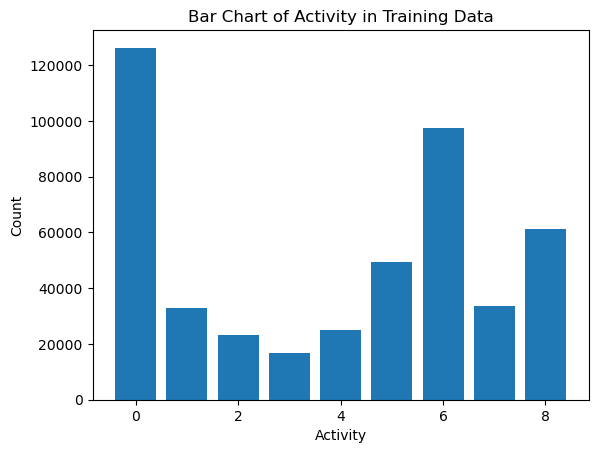

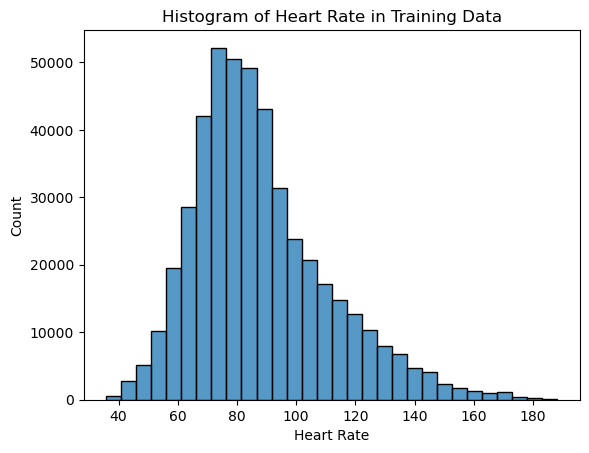

In [18]:
# 1.4 [2pts] Feature distribution

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

# Bar chart for activity in training data
activity_counts = train_df['activity'].value_counts()
plt.bar(activity_counts.index, activity_counts.values) # TODO
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Bar Chart of Activity in Training Data')
plt.show()

# Histogram for heart_rate in training data
sns.histplot(train_df['heart_rate'], bins=30)
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.title('Histogram of Heart Rate in Training Data')
plt.show()

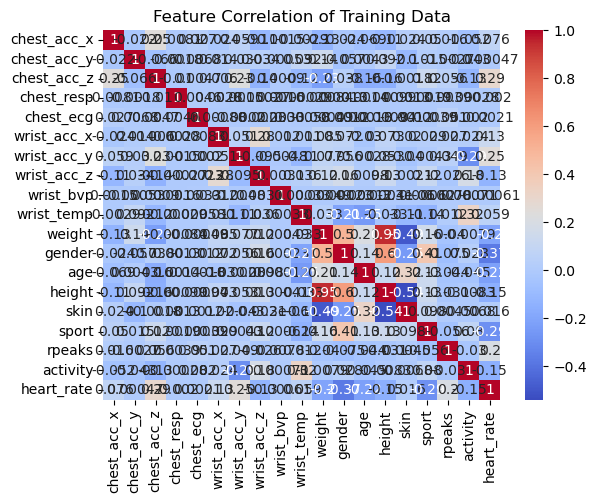

In [19]:
# 1.5 [2pts] Heatmap of feature correlation
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation of Training Data')
plt.show()

## 2    [15pts] K-Fold Cross Validation

In [20]:
import math
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

X_train = train_df.values[:, :-2].astype(np.float64)
y_train = train_df.values[:, -2].astype(np.int32)

X_test = test_df.values[:, :-1].astype(np.float64)
y_test = test_df.values[:, -1].astype(np.int32)

X_train = normalize(X_train, axis=0, norm="max")
X_test = normalize(X_test, axis=0, norm="max") 

In [22]:
## Using sklearn, we can implement Logistic Regression easily 
lr_model = LogisticRegression(C=1.0, max_iter=500)

lr_model.fit(X_train, y_train) 
# predicted probability on test set using logistic regression model
y_pred_train_lr = lr_model.predict(X_train)
y_prob_lr = lr_model.predict_proba(X_test)
y_pred_test_lr = lr_model.predict(X_test)
print("Logistic Regression:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr), roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))) 

## However, we do not consider the hyperparameter C

Logistic Regression:	 acc on train is 0.5152 ; acc on test is 0.4281 ; AUC on test is 0.8149


In [25]:
# 2.1 [6pts] K-fold Cross Validation using accuracy
## Choosing the hyper parameter C

num_folds = 5
C_choices = [0.1, 1, 10, 100, 1000]

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
C_to_accuracies = dict()

kf = KFold(n_splits=num_folds)
C_to_accuracies = {}
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of C that we find
# when running cross-validation. After running cross-validation,
# C_to_accuracies[C] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of C.
# C_to_accuracies = dict()


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of C. For each        #
# possible value of C, run the LogisticRegression algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of C in the C_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for C in C_choices:
    accuracies = []
    for fold in range(num_folds):
        X_train_fold = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
        y_train_fold = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])

        lr_model = LogisticRegression(C=C, max_iter=500)
        lr_model.fit(X_train_fold, y_train_fold)
        y_pred_fold = lr_model.predict(X_train_folds[fold])
        accuracy = accuracy_score(y_train_folds[fold], y_pred_fold)
        accuracies.append(accuracy)

    C_to_accuracies[C] = accuracies
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed accuracies
for C in sorted(C_to_accuracies):
    for accuracy in C_to_accuracies[C]:
        print('C = %.2f, accuracy = %f' % (C, accuracy))

C = 0.10, accuracy = 0.504312
C = 0.10, accuracy = 0.502971
C = 0.10, accuracy = 0.501577
C = 0.10, accuracy = 0.506007
C = 0.10, accuracy = 0.501309
C = 1.00, accuracy = 0.515070
C = 1.00, accuracy = 0.513858
C = 1.00, accuracy = 0.514040
C = 1.00, accuracy = 0.516679
C = 1.00, accuracy = 0.512925
C = 10.00, accuracy = 0.518406
C = 10.00, accuracy = 0.518459
C = 10.00, accuracy = 0.518084
C = 10.00, accuracy = 0.524005
C = 10.00, accuracy = 0.516153
C = 100.00, accuracy = 0.521055
C = 100.00, accuracy = 0.513686
C = 100.00, accuracy = 0.518320
C = 100.00, accuracy = 0.524166
C = 100.00, accuracy = 0.517344
C = 1000.00, accuracy = 0.519929
C = 1000.00, accuracy = 0.520680
C = 1000.00, accuracy = 0.518899
C = 1000.00, accuracy = 0.522192
C = 1000.00, accuracy = 0.517505


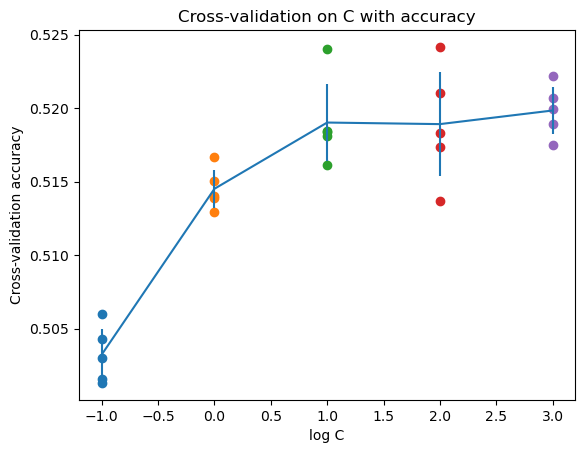

In [ ]:
# 2.2 [2pts] Plot the result of 2.1
plt.figure()
# plot the raw observations
for idx, C in enumerate(C_choices, 1):
    accuracies = C_to_accuracies[C]
    plt.scatter([math.log10(C)] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for _,v in sorted(C_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for _,v in sorted(C_to_accuracies.items())])
plt.errorbar([math.log10(i) for i in C_choices], accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on C with accuracy')
plt.xlabel('log C')
plt.ylabel('Cross-validation accuracy')
plt.show()

- Based on the result, which C value will you choose?

[C=1000]

Due to its better and more stable average performance

In [ ]:
 # 2.3 [5pts] K-fold Cross Validation using AUC

num_folds = 5
C_choices = [0.1, 1, 10, 100, 1000]

################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of C that we find
# when running cross-validation. After running cross-validation,
# C_to_AUC[C] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of C.
C_to_AUC = dict()


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of C. For each        #
# possible value of C, run the LogisticRegression algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of C in the C_to_AUC dictionary.                                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for C in C_choices:
    AUCs = []
    for fold in range(num_folds):
        X_train_fold = np.concatenate([X_train_folds[i] for i in range(num_folds) if i != fold])
        y_train_fold = np.concatenate([y_train_folds[i] for i in range(num_folds) if i != fold])

        lr_model = LogisticRegression(C=C, max_iter=500)
        lr_model.fit(X_train_fold, y_train_fold)
        y_pred_prob_fold = lr_model.predict_proba(X_train_folds[fold])
        AUC = roc_auc_score(y_train_folds[fold], y_pred_prob_fold, multi_class='ovr')
        AUCs.append(AUC)
    C_to_AUC[C] = AUCs
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed AUCs
for C in sorted(C_to_AUC):
    for accuracy in C_to_AUC[C]:
        print('C = %.2f, auc = %f' % (C, accuracy))

C = 0.10, auc = 0.868055
C = 0.10, auc = 0.866725
C = 0.10, auc = 0.866904
C = 0.10, auc = 0.868100
C = 0.10, auc = 0.866314
C = 1.00, auc = 0.872520
C = 1.00, auc = 0.871298
C = 1.00, auc = 0.871509
C = 1.00, auc = 0.872633
C = 1.00, auc = 0.870858
C = 10.00, auc = 0.872948
C = 10.00, auc = 0.871886
C = 10.00, auc = 0.871793
C = 10.00, auc = 0.873095
C = 10.00, auc = 0.871081
C = 100.00, auc = 0.873014
C = 100.00, auc = 0.871374
C = 100.00, auc = 0.871747
C = 100.00, auc = 0.873178
C = 100.00, auc = 0.871095
C = 1000.00, auc = 0.873079
C = 1000.00, auc = 0.871746
C = 1000.00, auc = 0.871997
C = 1000.00, auc = 0.873125
C = 1000.00, auc = 0.871047


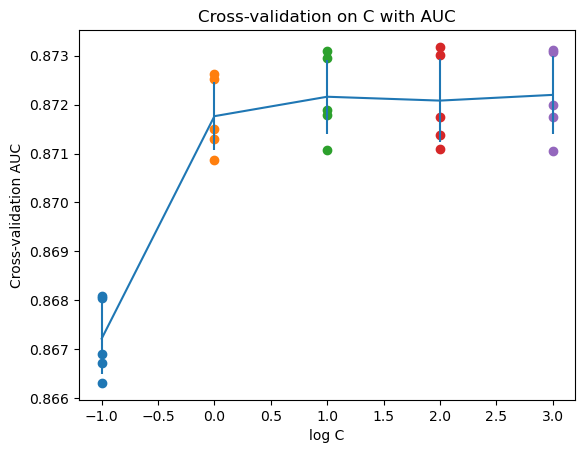

In [ ]:
# 2.4 [2pts] Plot the result of 2.3

# plot the raw observations
for idx, C in enumerate(C_choices, 1):
    accuracies = C_to_AUC[C]
    plt.scatter([math.log10(C)] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
AUCs_mean = np.array([np.mean(v) for _,v in sorted(C_to_AUC.items())])
AUCs_std = np.array([np.std(v) for _,v in sorted(C_to_AUC.items())])
plt.errorbar([math.log10(i) for i in C_choices], AUCs_mean, yerr=AUCs_std)
plt.title('Cross-validation on C with AUC')
plt.xlabel('log C')
plt.ylabel('Cross-validation AUC')
plt.show()

- According to the result, which C value will you choose?

[C=10]

## 3 [15pts] Various Classification Models

In [23]:
# Using C=10, we can get a better LogisticRegression model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

lr_model = LogisticRegression(C=10, max_iter=500)
lr_model.fit(X_train, y_train) 
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test) 
y_prob_lr = lr_model.predict_proba(X_test)
print("Logistic Regression:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_lr), accuracy_score(y_test, y_pred_test_lr), roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))) 

Logistic Regression:	 acc on train is 0.5166 ; acc on test is 0.4264 ; AUC on test is 0.8122


In [ ]:
# 3.1 [2pts] Tree model

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)

print("Decision Tree:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree), roc_auc_score(y_test, y_prob_tree, multi_class='ovr'))) 

Decision Tree:	 acc on train is 1.0000 ; acc on test is 0.5230 ; AUC on test is 0.7341


In [ ]:
# 3.2 [2pts] Multi- Layer Perceptron

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

input_size = X_train_tensor.shape[1]
hidden_size = 128
output_size = len(torch.unique(y_train_tensor))

MLP_model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MLP_model.parameters(), lr=0.001)
num_epochs = 100

for epoch in range(num_epochs):
    MLP_model.train()
    outputs = MLP_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

MLP_model.eval()

y_pred_train_mlp = MLP_model(X_train_tensor).argmax(dim=1).detach().numpy()
y_pred_test_mlp = MLP_model(X_test_tensor).argmax(dim=1).detach().numpy()
y_prob_mlp = torch.nn.functional.softmax(MLP_model(X_test_tensor), dim=1).detach().numpy()

print("MLP:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train_tensor, y_pred_train_mlp), accuracy_score(y_test_tensor, y_pred_test_mlp), roc_auc_score(y_test_tensor, y_prob_mlp, multi_class='ovr')))


MLP:	 acc on train is 0.8093 ; acc on test is 0.5073 ; AUC on test is 0.9049


In [ ]:
# 3.3 [2pts] Support Vector Machine

svm_model = SVC(probability=True, C=0.1, max_iter=23)
svm_model.fit(X_train, y_train)
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

print("SVM:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_svm), accuracy_score(y_test, y_pred_test_svm), roc_auc_score(y_test, y_prob_svm, multi_class='ovr'))) 

SVM:	 acc on train is 0.2359 ; acc on test is 0.2604 ; AUC on test is 0.6809


In [ ]:
# 3.4 [2pts] Naive Bayes

bayesian_model = GaussianNB()
bayesian_model.fit(X_train, y_train)
y_pred_train_nb = bayesian_model.predict(X_train)
y_pred_test_nb = bayesian_model.predict(X_test)
y_prob_nb = bayesian_model.predict_proba(X_test)
print("Naive Bayes:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_nb), accuracy_score(y_test, y_pred_test_nb), roc_auc_score(y_test, y_prob_nb, multi_class='ovr'))) 

Naive Bayes:	 acc on train is 0.5096 ; acc on test is 0.2920 ; AUC on test is 0.7894


In [ ]:
# 3.5 [2pts] Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

print("Random Forest:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_rf), accuracy_score(y_test, y_pred_test_rf), roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))) 

Random Forest:	 acc on train is 1.0000 ; acc on test is 0.6450 ; AUC on test is 0.9758


In [ ]:
# 3.6 [2pts] LightGBM

LightGBM_model = LGBMClassifier()
LightGBM_model.fit(X_train, y_train)
y_pred_train_gbm = LightGBM_model.predict(X_train)
y_pred_test_gbm = LightGBM_model.predict(X_test)
y_prob_gbm = LightGBM_model.predict_proba(X_test)

print("LightGBM:\t acc on train is %.4f ; acc on test is %.4f ; AUC on test is %.4f" 
        %(accuracy_score(y_train, y_pred_train_gbm), accuracy_score(y_test, y_pred_test_gbm), roc_auc_score(y_test, y_prob_gbm, multi_class='ovr'))) 

LightGBM:	 acc on train is 0.9185 ; acc on test is 0.5923 ; AUC on test is 0.9622


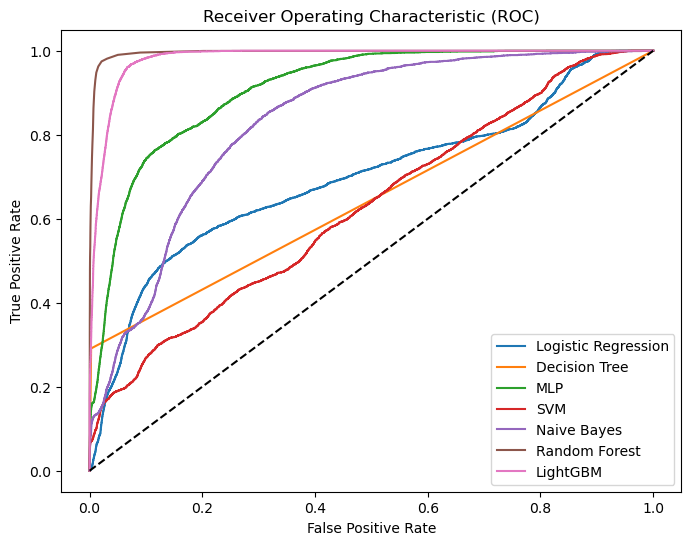

In [ ]:
# 3.7 [3pts] Plot ROCs in one image

################################################################################
# TODO:                                                                        #
# Plot the ROC on test set using ovr for all models above                      #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
plt.figure(figsize=(8, 6))
models = [
    ('Logistic Regression', y_prob_lr),
    ('Decision Tree', y_prob_tree),
    ('MLP', y_prob_mlp),
    ('SVM', y_prob_svm),
    ('Naive Bayes', y_prob_nb),
    ('Random Forest', y_prob_rf),
    ('LightGBM', y_prob_gbm)
]

for model_name, y_prob in models:
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

- From the result, which model performs well?
[Random forest]
- And which model performs poor?
[SVM]

## 4 [15pts] Model Combination Strategies

In [ ]:

# 4.1 Voting
def voting(predictions):
    # Perform majority voting
    voting_result = np.argmax(np.bincount(predictions))
    return voting_result

# Make predictions using different models
predictions_lr = lr_model.predict(X_test)
predictions_tree = tree_model.predict(X_test)
predictions_mlp = MLP_model.predict(X_test)
predictions_svm = svm_model.predict(X_test)
predictions_nb = bayesian_model.predict(X_test)
predictions_rf = rf_model.predict(X_test)
predictions_gbm = LightGBM_model.predict(X_test)

# Apply voting strategy
y_pred_test_voting = np.array([voting([pred_lr, pred_tree, pred_mlp, pred_svm, pred_nb, pred_rf, pred_gbm]) 
                              for pred_lr, pred_tree, pred_mlp, pred_svm, pred_nb, pred_rf, pred_gbm 
                              in zip(predictions_lr, predictions_tree, predictions_mlp, predictions_svm, 
                                     predictions_nb, predictions_rf, predictions_gbm)])

y_pred_train_voting = np.array([voting([pred_lr, pred_tree, pred_mlp, pred_svm, pred_nb, pred_rf, pred_gbm]) 
                               for pred_lr, pred_tree, pred_mlp, pred_svm, pred_nb, pred_rf, pred_gbm 
                               in zip(y_pred_train_lr, y_pred_train_tree, y_pred_train_mlp, y_pred_train_svm, 
                                      y_pred_train_nb, y_pred_train_rf, y_pred_train_gbm)])

print("Voting strategy:\t acc on train is %.4f ; acc on test is %.4f" 
      %(accuracy_score(y_train, y_pred_train_voting), accuracy_score(y_test, y_pred_test_voting))) 


Voting strategy:	 acc on train is 0.9238 ; acc on test is 0.5674


In [26]:
# 4.2 Stacking
k = 5
mlp_model = MLPClassifier()
svm_model = SVC(probability=True, C=0.1, max_iter=23)
lgbm_model = LGBMClassifier()


lr_model = LogisticRegression()

stacking_train = np.zeros((X_train.shape[0], 3))
stacking_test = np.zeros((X_test.shape[0], 3))
kf = KFold(n_splits=k)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # 训练初级
    mlp_model.fit(X_train_fold, y_train_fold)
    svm_model.fit(X_train_fold, y_train_fold)
    lgbm_model.fit(X_train_fold, y_train_fold)
    
    mlp_pred = mlp_model.predict(X_val_fold)
    svm_pred = svm_model.predict(X_val_fold)
    lgbm_pred = lgbm_model.predict(X_val_fold)
    
    # 拼接
    stacking_train[val_index] = np.column_stack((mlp_pred, svm_pred, lgbm_pred))
    
    mlp_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    lgbm_model.fit(X_train, y_train)
    mlp_pred_test = mlp_model.predict(X_test)
    svm_pred_test = svm_model.predict(X_test)
    lgbm_pred_test = lgbm_model.predict(X_test)
    stacking_test += np.column_stack((mlp_pred_test, svm_pred_test, lgbm_pred_test))

stacking_test /= k
# 使用次级
lr_model.fit(stacking_train, y_train)
y_pred_train_stacking = lr_model.predict(stacking_train)
y_pred_test_stacking = lr_model.predict(stacking_test)

print("Stacking strategy:\t acc on train is %.4f ; acc on test is %.4f" 
      %(accuracy_score(y_train, y_pred_train_stacking), accuracy_score(y_test, y_pred_test_stacking)))

## 5 [45pts] Regression Task in Practice

Write your code below.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb

X_train1 = train_df.values[:, :-1].astype(np.float64)
y_train1 = train_df.values[:, -1].astype(np.float64)
X_test1 = test_df.values[:, :].astype(np.float64)

rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train1, y_train1)
y_pred_test_rf = rf_model.predict(X_test1)

# xgb_model = xgb.XGBRegressor()
# xgb_model.fit(X_train, y_train)
# y_pred_test_xgb = xgb_model.predict(X_test)

predictions = pd.DataFrame({'id': range(0, len(y_pred_test_rf) ), 'expected': y_pred_test_rf})
# 将预测结果保存为CSV文件
predictions.to_csv('211300060.csv', index=False)

**在本地环境上运行的使用optuna调参因为时间过长所以我转到服务器上继续运行了。**

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
X_train1 = train_df.values[:, :-1].astype(np.float64)
y_train1 = train_df.values[:, -1].astype(np.float64)
X_test1 = test_df.values[:, :].astype(np.float64)
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    
    # Fit the model on the training data
    rf_model.fit(X_train1, y_train1)
    
    # Predict on the test data
    y_pred_test_rf = rf_model.predict(X_test1)

    return rf_model

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params

rf_model = RandomForestRegressor(**best_params)

rf_model.fit(X_train1, y_train1)

y_pred_test_rf = rf_model.predict(X_test1)
predictions = pd.DataFrame({'id': range(0, len(y_pred_test_rf)), 'expected': y_pred_test_rf})
predictions.to_csv('211300060.csv', index=False)


[I 2023-06-25 16:54:55,323] A new study created in memory with name: no-name-0525ef01-3ba5-45fb-b520-94c3557e3411
[W 2023-06-25 17:21:51,061] Trial 0 failed with parameters: {'n_estimators': 235, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 6} because of the following error: The value RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=235) could not be cast to float..
[W 2023-06-25 17:21:51,062] Trial 0 failed with value RandomForestRegressor(max_depth=16, min_samples_leaf=6, min_samples_split=8,
                      n_estimators=235).
[W 2023-06-25 17:55:14,155] Trial 1 failed with parameters: {'n_estimators': 734, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4} because of the following error: The value RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=734) could not be cast to float..
[W 2023-06-25 17:55:14,157] Trial 1 failed with 

KeyboardInterrupt: 

**服务器中输出如下**


[I 2023-06-25 11:04:05,415] A new study created in memory with name: no-name-9c5177f6-a17c-4e5c-9f76-85b186af60c7
[W 2023-06-25 11:35:04,095] Trial 0 failed with parameters: {'n_estimators': 336, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 10} because of the following error: The value RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=336) could not be cast to float..
[W 2023-06-25 11:35:04,095] Trial 0 failed with value RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=336).
[W 2023-06-25 12:35:45,122] Trial 1 failed with parameters: {'n_estimators': 760, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 10} because of the following error: The value RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=6,
                      n_estimators=760) could not be cast to float..
[W 2023-06-25 12:35:45,123] Trial 1 failed with value RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=6,
                      n_estimators=760).
[W 2023-06-25 13:16:58,340] Trial 2 failed with parameters: {'n_estimators': 937, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 9} because of the following error: The value RandomForestRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=6,
                      n_estimators=937) could not be cast to float..
[W 2023-06-25 13:16:58,341] Trial 2 failed with value RandomForestRegressor(max_depth=6, min_samples_leaf=9, min_samples_split=6,
                      n_estimators=937).
